In [1]:
# Prepare Sample Time-Series Data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

n_series = 100
series_length = 50
n_clusters = 3

print(f"Parameters defined: {n_series} series, length {series_length}, {n_clusters} clusters.")

Parameters defined: 100 series, length 50, 3 clusters.


In [2]:
time = np.linspace(0, 10, series_length)

# Define distinct base patterns
pattern_sine = np.sin(time) * 5
pattern_cosine = np.cos(time) * 5
pattern_linear_trend = np.linspace(0, 10, series_length) + np.random.normal(0, 0.5, series_length)

base_patterns = {
    0: pattern_sine,
    1: pattern_cosine,
    2: pattern_linear_trend
}

print("Base patterns created successfully.")

Base patterns created successfully.


**Reasoning**:
Now that the base patterns are defined, the next step is to generate the synthetic time series. This involves iterating through the desired number of series, randomly assigning each to one of the base patterns, and then adding random noise and a random offset to ensure uniqueness while maintaining the underlying pattern characteristics.



In [ ]:
time_series_data = []
labels = []

for i in range(n_series):
    cluster_id = np.random.randint(0, n_clusters)
    base_pattern = base_patterns[cluster_id]
    noise = np.random.normal(0, 0.5, series_length) # Add random noise
    offset = np.random.uniform(-2, 2) # Add a random offset to each series

    time_series_data.append(base_pattern + noise + offset)
    labels.append(cluster_id)

time_series_df = pd.DataFrame(time_series_data)

print(f"Generated {len(time_series_data)} synthetic time series.")
print(f"DataFrame shape: {time_series_df.shape}")

Generated 100 synthetic time series.
DataFrame shape: (100, 50)


**Reasoning**:
To visually confirm that the synthetic time series exhibit distinct patterns corresponding to their assigned clusters, the next step is to plot a few examples from each cluster. This will help validate the data generation process.



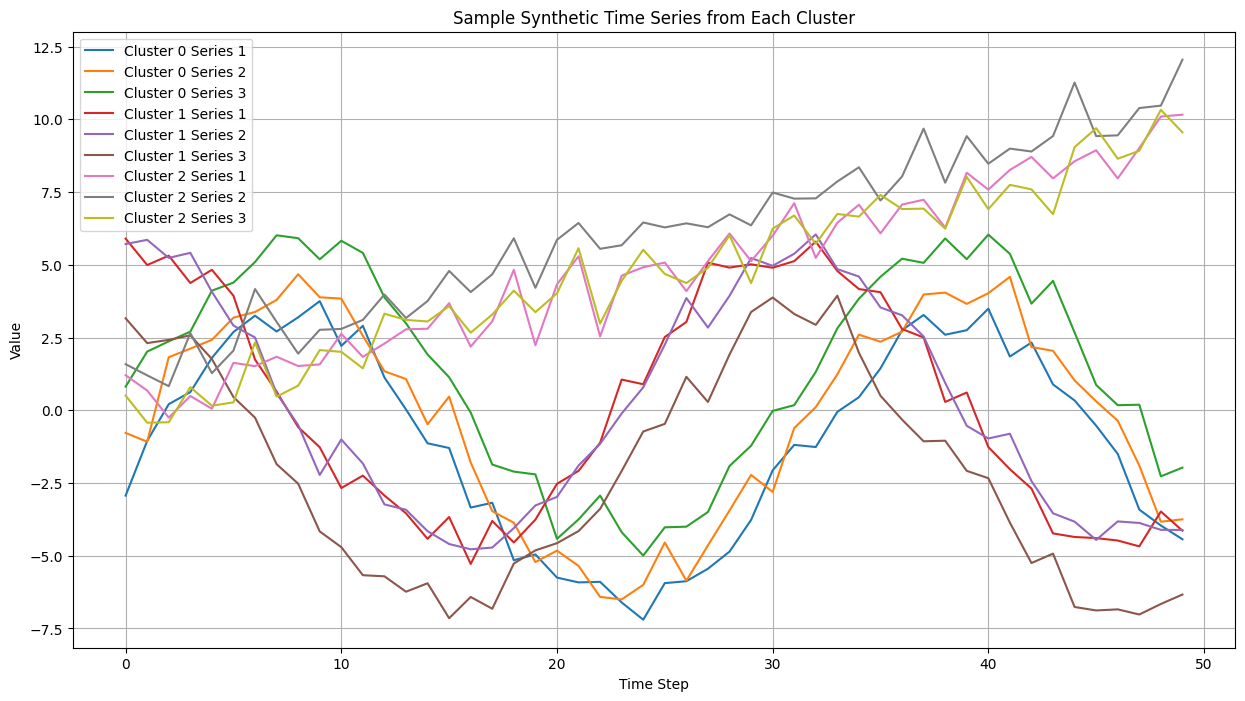

Visualized sample time series from each cluster.


In [ ]:
plt.figure(figsize=(15, 8))

for i in range(n_clusters):
    # Select a few series from each cluster to plot
    cluster_indices = [j for j, label in enumerate(labels) if label == i]

    # Plot up to 3 series per cluster
    for k in range(min(3, len(cluster_indices))):
        plt.plot(time_series_data[cluster_indices[k]], label=f'Cluster {i} Series {k+1}')

plt.title('Sample Synthetic Time Series from Each Cluster')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.legend(loc='best')
plt.grid(True)
plt.show()

print("Visualized sample time series from each cluster.")

**Reasoning**:
Now that the instructions for standardizing the data are laid out, the next step is to implement the Z-score normalization for each time series in the `time_series_df` as instructed. This involves calculating the mean and standard deviation for each row (time series) and then applying the normalization formula.



In [ ]:
standardized_time_series = (time_series_df - time_series_df.mean(axis=1).values[:, np.newaxis]) / time_series_df.std(axis=1).values[:, np.newaxis]

print("Time series data standardized successfully.")
print(f"Shape of standardized data: {standardized_time_series.shape}")
print("First 5 rows of standardized data:")
print(standardized_time_series.head())

Time series data standardized successfully.
Shape of standardized data: (100, 50)
First 5 rows of standardized data:
         0         1         2         3         4         5         6   \
0 -1.252177 -1.435760 -1.760572 -1.501453 -1.653885 -1.103978 -1.143205   
1  1.520648  1.279299  1.364770  1.115072  1.235501  0.998484  0.415561   
2 -0.565811 -0.003739  0.374147  0.498279  0.849954  1.116001  1.283868   
3 -1.538339 -1.670164 -1.797837 -1.171646 -1.644292 -1.377824 -0.651765   
4 -1.445509 -1.765088 -1.759504 -1.346362 -1.565218 -1.524969 -0.820454   

         7         8         9   ...        40        41        42        43  \
0 -1.030703 -1.141581 -1.122822  ...  0.972784  1.208980  1.364372  1.107553   
1  0.122599 -0.202194 -0.386055  ... -0.383789 -0.587079 -0.763792 -1.173877   
2  1.121104  1.267134  1.433010  ...  1.355620  0.863852  1.007701  0.576976   
3 -1.038683 -1.413701 -1.132425  ...  0.826442  1.005038  0.970793  1.153235   
4 -1.458062 -1.329036 -0.910033 

## Apply Pretrained Model for Clustering

### Subtask:
Apply a pretrained model (MiniRocket for feature extraction) followed by K-means clustering to the standardized time-series data.


**Reasoning**:
The first instruction is to install the `sktime` library, which is necessary for `MiniRocket` feature extraction.



In [ ]:
try:
    import sktime
    print("sktime is already installed.")
except ImportError:
    print("sktime not found. Installing...")
    !pip install sktime
    print("sktime installed successfully.")

sktime not found. Installing...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.3/36.3 MB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.5/151.5 kB 17.3 MB/s eta 0:00:00
sktime installed successfully.


**Reasoning**:
Now that `sktime` is installed, the next step is to import `MiniRocket` and `KMeans`, instantiate them, extract features using `MiniRocket`, and then apply `KMeans` clustering to the extracted features, as per the remaining instructions of the subtask.



In [ ]:
from sktime.transformations.panel.rocket import MiniRocket
from sklearn.cluster import KMeans

# Reshape data for MiniRocket (sktime transformers expect 3D data: (n_samples, n_dimensions, n_timesteps))
# Our data is (n_samples, n_timesteps), so we add a dimension for n_dimensions=1
X = standardized_time_series.values[:, np.newaxis, :]

# 3. Instantiate a MiniRocket transformer
minirocket = MiniRocket(random_state=42)

# 4. Fit and transform the standardized_time_series using MiniRocket
rocket_features = minirocket.fit_transform(X)

# 5. Instantiate a KMeans clustering model
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10) # n_init is set to 10 for reproducibility with older sklearn versions

# 6. Fit the KMeans model to the rocket_features and predict the cluster labels
predicted_clusters = kmeans.fit_predict(rocket_features)

print("MiniRocket feature extraction and KMeans clustering completed successfully.")
print(f"Shape of MiniRocket features: {rocket_features.shape}")
print(f"First 10 predicted clusters: {predicted_clusters[:10]}")

MiniRocket feature extraction and KMeans clustering completed successfully.
Shape of MiniRocket features: (100, 9996)
First 10 predicted clusters: [1 2 0 1 1 0 1 2 0 2]


## Visualize Clustering Results

### Subtask:
Create visualizations to analyze and present the identified time-series clusters.


#### Instructions
1. Perform Dimensionality Reduction (e.g., PCA) on the `rocket_features` to reduce them to 2 components. Store the results in a new variable, for example, `features_2d`.
2. Create a scatter plot of the `features_2d` using `matplotlib.pyplot`.
3. Color the points in the scatter plot according to their `predicted_clusters`.
4. Add a legend to the plot to clearly indicate which color corresponds to which cluster.
5. Set appropriate labels for the x and y axes (e.g., 'Principal Component 1', 'Principal Component 2') and a title for the plot (e.g., 'Time Series Clusters (PCA)') to enhance readability.

**Reasoning**:
Now that the instructions for visualizing the clustering results are provided, the next step is to implement the dimensionality reduction using PCA and then create the scatter plot as described in the instructions. This will involve importing `PCA` from `sklearn.decomposition` and using `matplotlib.pyplot` for plotting.



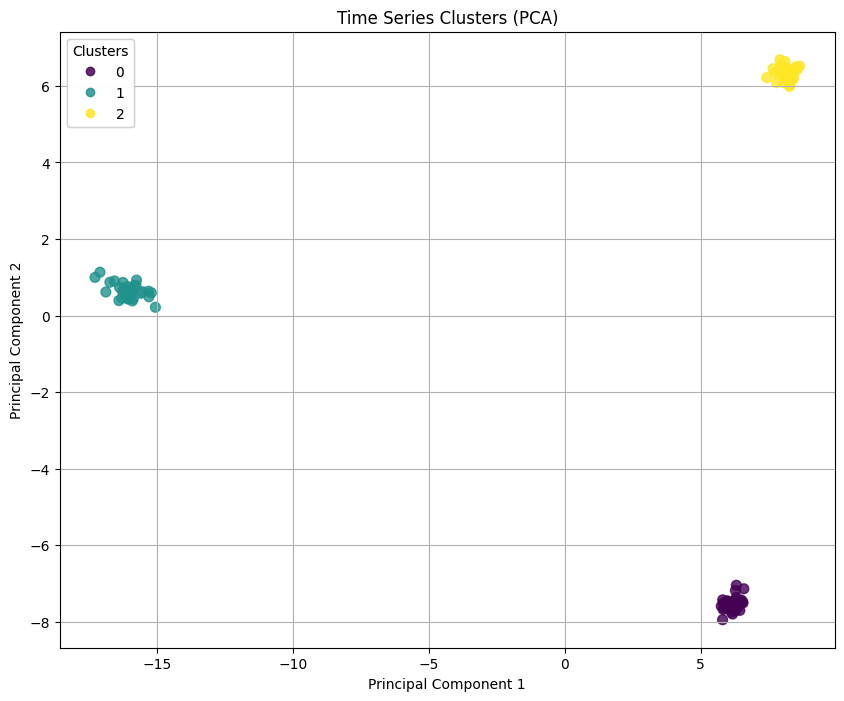

Clustering results visualized successfully using PCA.


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 1. Perform Dimensionality Reduction (e.g., PCA) on the rocket_features
pca = PCA(n_components=2, random_state=42)
features_2d = pca.fit_transform(rocket_features)

# 2. Create a scatter plot of the features_2d
plt.figure(figsize=(10, 8))
scatter = plt.scatter(features_2d[:, 0], features_2d[:, 1], c=predicted_clusters, cmap='viridis', s=50, alpha=0.8)

# 4. Add a legend to the plot
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.gca().add_artist(legend1)

# 5. Set appropriate labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Time Series Clusters (PCA)')
plt.grid(True)
plt.show()

print("Clustering results visualized successfully using PCA.")